In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
import matplotlib.pyplot  as plt

In [ ]:
drive.mount("/content/drive")

Mounted at /content/drive


In [ ]:
en_mellum_df = pd.read_csv("/content/drive/MyDrive/mellum_en_fim_with_metrics.csv")
non_en_mellum_df = pd.read_csv("/content/drive/MyDrive/mellum_non_en_fim_with_metrics.csv")
en_star_df = pd.read_csv("/content/drive/MyDrive/en_fim_with_metrics.csv")
non_en_star_df = pd.read_csv("/content/drive/MyDrive/non_en_fim_with_metrics.csv")


METRIC_COLS = [
    "exact_match", "bleu", "meteor", "rouge1_f", "rouge2_f", "rougeL_f",
]

In [ ]:
meanprops = {
    "marker": "x",
    "markeredgecolor": "black",
    "markeredgewidth": 1.5
}

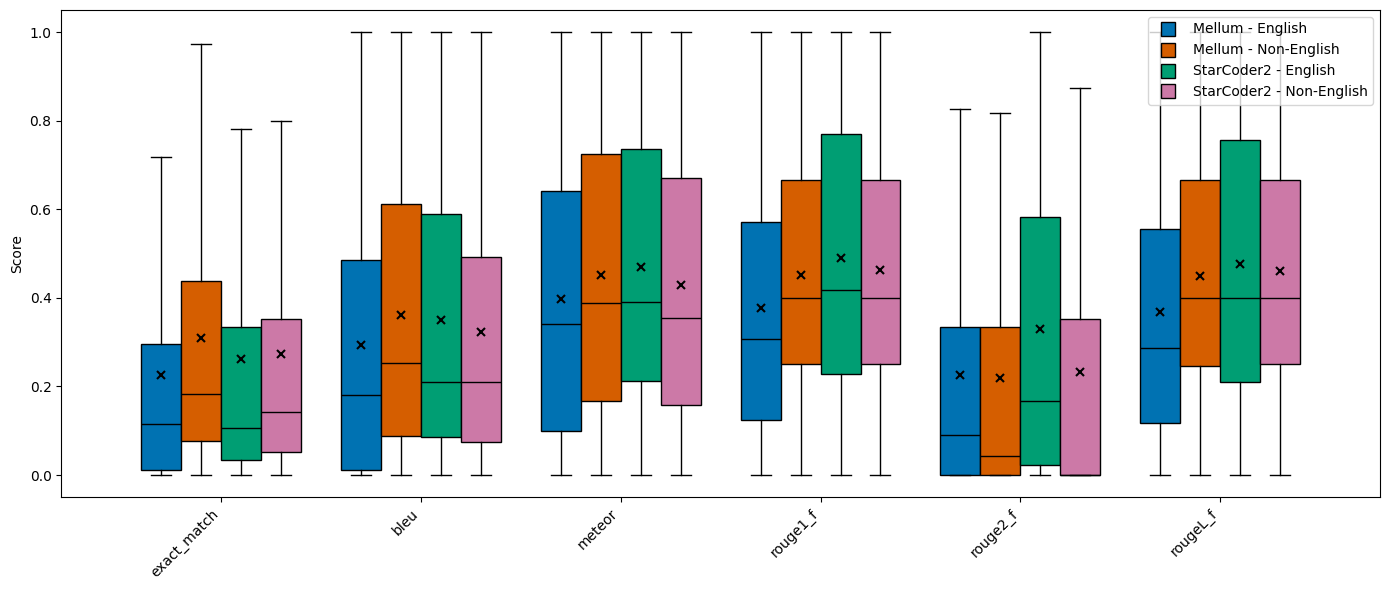

In [46]:
import matplotlib.pyplot as plt
import numpy as np

def plot_grouped_boxplots_cb(dfs, labels, cols, colors, legend_location ='upper right', width=0.8 ):
    n_metrics = len(cols)
    n_dfs = len(dfs)
    x = np.arange(n_metrics)

    # how far apart each box is
    box_width = width / n_dfs

    meanprops = {
        "marker": "x",
        "markeredgecolor": "black",
        "markeredgewidth": 1.5
    }

    fig, ax = plt.subplots(figsize=(14, 6))

    for i, (df, lbl, col) in enumerate(zip(dfs, labels, colors)):
        data = [df[c].dropna() for c in cols]
        # center all at x, then offset
        positions = x - width/2 + box_width/2 + i*box_width

        bp = ax.boxplot(
            data,
            positions=positions,
            widths=box_width,
            patch_artist=True,
            showfliers=False,
            showmeans=True,
            meanprops=meanprops
        )

        # fill & style elements
        for box in bp['boxes']:
            box.set(facecolor=col, edgecolor='black')
        for element in (bp['whiskers'], bp['caps'], bp['medians'], bp['means']):
            for art in element:
                art.set(color='black')

    ax.set_xticks(x)
    ax.set_xticklabels(cols, rotation=45, ha='right')
    ax.set_ylabel("Score")

    # create proxy artists for the legend
    handles = [
        plt.Line2D([0], [0],
                   marker='s',
                   markersize=10,
                   markerfacecolor=colors[j],
                   markeredgecolor='black',
                   linestyle='None',
                   label=labels[j])
        for j in range(n_dfs)
    ]
    ax.legend(handles=handles, loc=legend_location)
    plt.tight_layout()
    plt.show()



all_labels = ['Mellum - English', 'Mellum - Non-English', 'StarCoder2 - English', 'StarCoder2 - Non-English']

# A 4-color blind-safe palette (Tol’s extended set)
cb4 = ['#0072B2',  # blue
       '#D55E00',  # orange
       '#009E73',  # green
       '#CC79A7']  # pink

plot_grouped_boxplots_cb(
    dfs=[en_mellum_df, non_en_mellum_df, en_star_df, non_en_star_df],
    labels=all_labels,
    cols=METRIC_COLS,
    colors=cb4
)


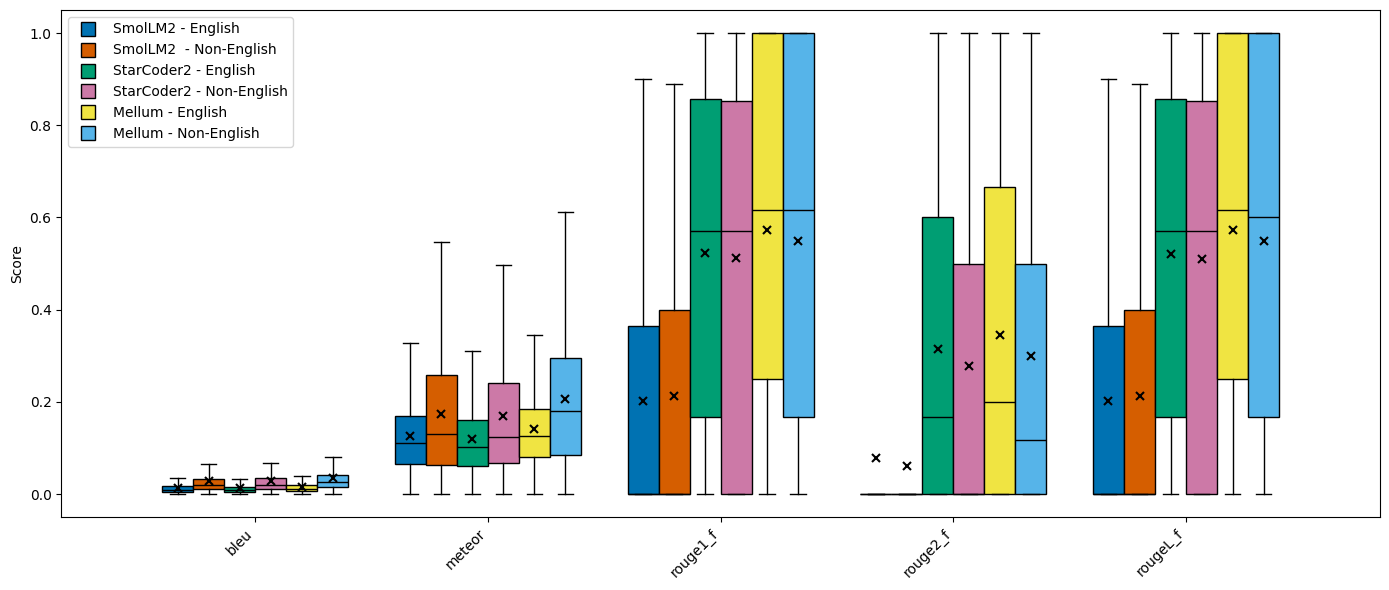

In [48]:
en_smol_line_df = pd.read_csv("/content/drive/MyDrive/en_next_line_with_metrics.csv")
non_en_smol_line_df = pd.read_csv("/content/drive/MyDrive/non_en_next_line_with_metrics.csv")
en_star_line_df = pd.read_csv("/content/drive/MyDrive/star_coder_en_next_line_with_with_metrics.csv")
non_en_star_line_df = pd.read_csv("/content/drive/MyDrive/star_coder_non_en_next_line_with_with_metrics.csv")
en_mellum_line_df = pd.read_csv("/content/drive/MyDrive/mellum_en_next_line_with_with_metrics.csv")
non_en_mellum_line_df = pd.read_csv("/content/drive/MyDrive/mellum_non_en_next_line_with_with_metrics.csv")

METRIC_COLS_CASUAL = [
  "bleu", "meteor", "rouge1_f", "rouge2_f", "rougeL_f",
]

all_labels_casual = ['SmolLM2 - English', 'SmolLM2  - Non-English', 'StarCoder2 - English', 'StarCoder2 - Non-English', 'Mellum - English', 'Mellum - Non-English']


cb6 = [
    '#0072B2',  # blue
    '#D55E00',  # orange
    '#009E73',  # green
    '#CC79A7',  # pink
    '#F0E442',  # yellow
    '#56B4E9'   # cyan
]

plot_grouped_boxplots_cb(
    dfs=[en_smol_line_df, non_en_smol_line_df, en_star_line_df, non_en_star_line_df, en_mellum_line_df, non_en_mellum_line_df],
    labels=all_labels_casual,
    cols=METRIC_COLS_CASUAL,
    colors=cb6,
    legend_location = 'upper left'
)

In [ ]:
dfs = {
    "en_smol":        en_smol_line_df,
    "non_en_smol":    non_en_smol_line_df,
    "en_star":        en_star_line_df,
    "non_en_star":    non_en_star_line_df,
    "en_mellum":      en_mellum_line_df,
    "non_en_mellum":  non_en_mellum_line_df,
}

summary_dfs = {}
for name, df in dfs.items():
    summary = df[METRIC_COLS].agg(['mean','std']).T
    summary_dfs[name] = summary

combined = pd.concat(summary_dfs, names=["dataset","metric"])

In [ ]:
combined

mean       std
dataset       metric                         
en_smol       exact_match  0.001373  0.008370
              bleu         0.013660  0.015613
              meteor       0.126269  0.083312
              rouge1_f     0.202617  0.317535
              rouge2_f     0.079265  0.214660
              rougeL_f     0.201998  0.316992
non_en_smol   exact_match  0.001775  0.010157
              bleu         0.028686  0.037468
              meteor       0.173019  0.140273
              rouge1_f     0.212834  0.319324
              rouge2_f     0.060224  0.173888
              rougeL_f     0.212703  0.319292
en_star       exact_match  0.001323  0.007943
              bleu         0.012924  0.015237
              meteor       0.119203  0.079258
              rouge1_f     0.522124  0.363778
              rouge2_f     0.315135  0.370492
              rougeL_f     0.521443  0.363799
non_en_star   exact_match  0.002209  0.012005
              bleu         0.029097  0.032920
              meteor       0.168847  0.136012
              rouge1_f     0.511279  0.384162
              rouge2_f     0.277443  0.354065
              rougeL_f     0.510901  0.384092
en_mellum     exact_match  0.002151  0.011859
              bleu         0.015765  0.018708
              meteor       0.141031  0.084436
              rouge1_f     0.573266  0.368494
              rouge2_f     0.344684  0.392958
              rougeL_f     0.572662  0.368619
non_en_mellum exact_match  0.002446  0.011900
              bleu         0.034398  0.034781
              meteor       0.206645  0.145449
              rouge1_f     0.549581  0.380112
              rouge2_f     0.300555  0.372419
              rougeL_f     0.549026  0.380165